In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

In [2]:
tokenizer = Tokenizer()

data = "Jhalak Dikhla Ja/n Jhalak Dikhla Ja/n Jhalak Dikhla Ja/n Ek baar aaja aaja aaja aa ja/n Ek baar aaja aaja aaja aa ja/n"
corpus = data.lower().split("/n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'aaja': 1, 'ja': 2, 'jhalak': 3, 'dikhla': 4, 'ek': 5, 'baar': 6, 'aa': 7}
8


In [3]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

In [4]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

In [5]:
xs , labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
print(xs[6])

[0 0 0 0 0 5]


In [7]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 1. 0.]


In [8]:
print(xs[5])
print(ys[5])

[0 0 0 0 3 4]
[0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
print(tokenizer.word_index)

{'aaja': 1, 'ja': 2, 'jhalak': 3, 'dikhla': 4, 'ek': 5, 'baar': 6, 'aa': 7}


In [11]:
from tensorflow.keras.layers import Bidirectional

model= Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20 , return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=300, verbose=1)        

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.0556 - loss: 2.0801
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4444 - loss: 2.0716
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4444 - loss: 2.0623
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4444 - loss: 2.0514
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4444 - loss: 2.0403
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4444 - loss: 2.0303
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4444 - loss: 2.0146
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4444 - loss: 1.9959
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4444 - loss: 1.9782
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4444 - loss: 1.9566
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.4444 - loss: 1.9283
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4444 - los

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

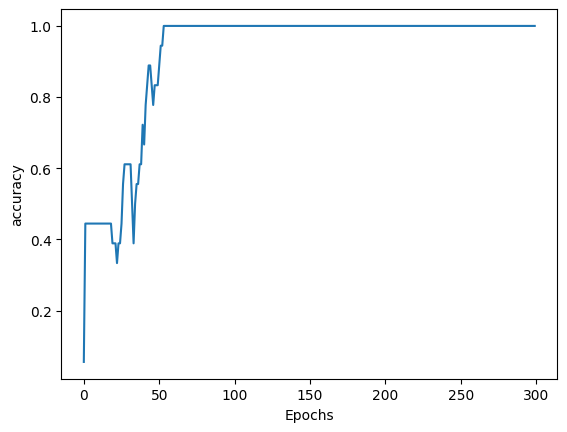

In [13]:
plot_graphs(history, "accuracy")

In [14]:
seed_text = "Zara si dil mein thi jagah"
next_words = 100

for _ in range(next_words): 
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=-1)[0]
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            output_word = word
            break
    
    seed_text += " " + output_word  
    print(seed_text)

Zara si dil mein thi jagah dikhla
Zara si dil mein thi jagah dikhla dikhla
Zara si dil mein thi jagah dikhla dikhla ja
Zara si dil mein thi jagah dikhla dikhla ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja ja ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja ja ja ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja ja ja ja ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja ja ja ja ja ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja ja ja ja ja ja ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja ja ja ja ja ja ja ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja ja ja ja ja ja ja ja ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja ja ja ja ja ja ja ja ja ja ja
Zara si dil mein thi jagah dikhla dikhla ja ja ja ja ja ja ja ja ja ja ja ja ja ja
Zara si dil mein thi jagah dikhla di